<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/GHZ_State_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation of GHZ state**


The GHZ State is:

$$ GHZ = \frac{|0\rangle^{\otimes n} + |1\rangle^{\otimes n}}{2}$$

## **1. Importing necessary Libraries**


In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = AerSimulator()

## **2. The Circuit**


In [4]:
# Input the number of qubits, n, in the GHZ state

n = 4

# Preparing the Quantum Circuit
ghz = QuantumCircuit(n,n)

# Applying necessary gates
ghz.h(0)
for i in range(n-1):
  ghz.cnot(i,i+1)

ghz.barrier()

# Measuring qubits 
ghz.measure(range(n), range(n))

# Drawing the circuit
ghz.draw()


┌───┐                ░ ┌─┐         
q_0: ┤ H ├──■─────────────░─┤M├─────────
     └───┘┌─┴─┐           ░ └╥┘┌─┐      
q_1: ─────┤ X ├──■────────░──╫─┤M├──────
          └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
               └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                    └───┘ ░  ║  ║  ║ └╥┘
c: 4/════════════════════════╩══╩══╩══╩═
                             0  1  2  3

> **Explanation:** The state of qubit after each state us mentioned below
1. $|0\rangle^{\otimes n}$
2. $\frac{|0\rangle^{\otimes n} + |1\rangle|0\rangle^{\otimes n-1}}{2}$
3. $\frac{|0\rangle^{\otimes n} + |11\rangle|0\rangle^{\otimes n-2}}{2}$
4. $\frac{|0\rangle^{\otimes n} + |111\rangle|0\rangle^{\otimes n-3}}{2}$ ...

This pattern continues and creates:

$$ GHZ = \frac{|0\rangle^{\otimes n} + |1\rangle^{\otimes n}}{2} $$


## **3. Measuring the Qubits**

Total count for possible combinations of output are:  {'0000': 494, '1111': 530}


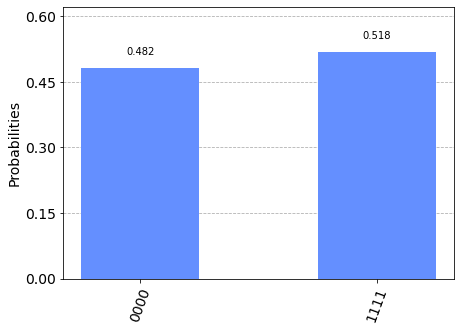

In [5]:
# Compiling the circuit
compiled_circuit = transpile(ghz, simulator)

shots = 1000000
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(ghz)
print("Total count for possible combinations of output are: ", counts)

# Plot a histogram
plot_histogram(counts)

counts for $|0\rangle^{\otimes n} \approx |1\rangle^{\otimes n}$ verifies the claim.